# 线性SVM分类

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris['data'][:,(2,3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline((
    ('Scaler',StandardScaler()),
    ('Linear_svc',LinearSVC(C=1,loss='hinge'))
))
svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [3]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [4]:
import matplotlib.pyplot as plt 

plt.plot(x[:,0][y==1],x[:,1][y==1],'b.')
plt.plot(x[:,0][y==0],x[:,1][y==0],'y.')

# 非线性SVM分类

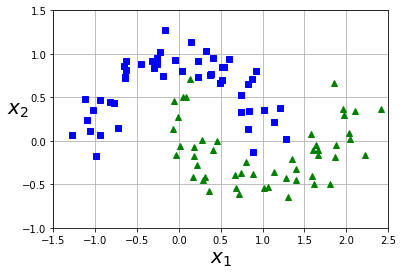

In [5]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y==0],x[:, 1][y==0], "bs")
    plt.plot(x[:, 0][y==1],x[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = ((
    ('Poly_features',PolynomialFeatures(degree=3)),
    ('Scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
))
polynomial_svm_clf.fit(x,y)

d:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('Poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

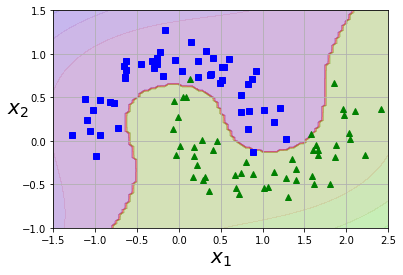

In [39]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)  #从坐标向量中返回坐标矩阵
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)  #decision_function决策函数,返回实例到各个类别的距离
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# 多项式核

In [57]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='poly',degree=3,coef0=1,C=5))
))

poly_kernel_svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

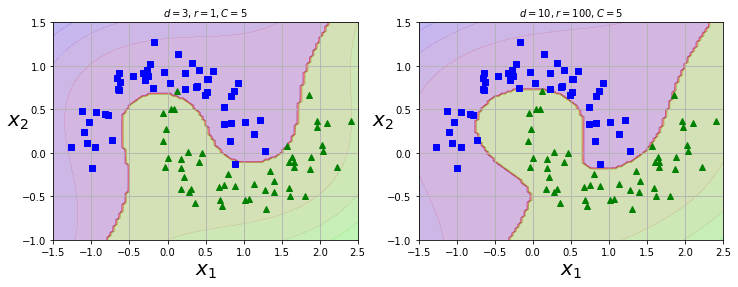

In [58]:
plt.figure(figsize=(12, 4))
# d=3, r=1, C=5
plt.subplot(121)
plt.title(r"$d=3, r=1, C=5$", fontsize=10)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

# d=10, r=100, C=5
plt.subplot(122)
plt.title(r"$d=10, r=100, C=5$", fontsize=10)
poly_kernel_svm_clf2 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='poly',degree=10,coef0=100,C=5))
))

poly_kernel_svm_clf2.fit(x,y)

plot_predictions(poly_kernel_svm_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

# 添加相似特征

*公式:高斯RBF*
![image.png](datasets/expression/高斯RBF.PNG)

In [59]:
# 在x1添加x1=-2和x1=1
# 我们看实例x1=-1： 它与第一个地标的距离为1， 与第二个地标的距离为2。 
# 因此它的新特征为 x2=eps（-0.3×12） ≈0.74， x3=eps（-0.3×22） ≈0.30

In [61]:
# rbf_kernel_svm_clf = Pipeline((
#         ("scaler", StandardScaler()),
#         ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
#     ))
# rbf_kernel_svm_clf.fit(x, y)

def rbf_plot(gamma,C):
    global x,y
    rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ))
    rbf_kernel_svm_clf.fit(x, y)
    return rbf_kernel_svm_clf


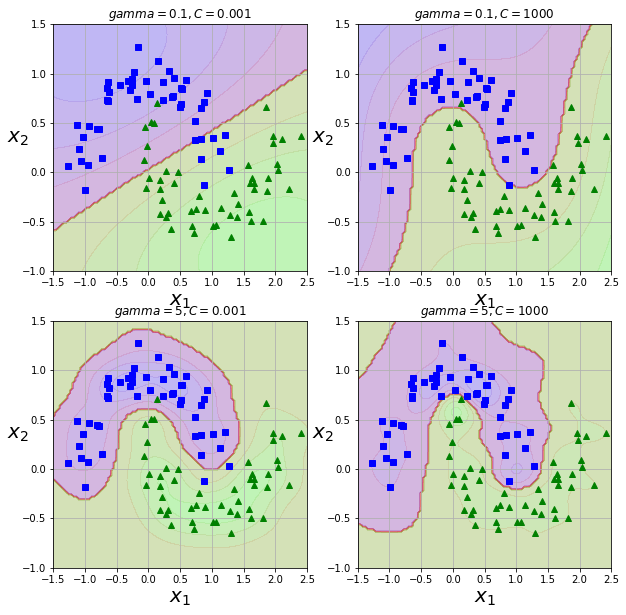

In [68]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title(r"$gamma=0.1, C=0.001$", fontsize=12)
plot_predictions(rbf_plot(gamma=0.1, C=0.001), [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.subplot(222)
plt.title(r"$gamma=0.1, C=1000$", fontsize=12)
plot_predictions(rbf_plot(gamma=0.1, C=1000), [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.subplot(223)
plt.title(r"$gamma=5, C=0.001$", fontsize=12)
plot_predictions(rbf_plot(gamma=5, C=0.001), [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.subplot(224)
plt.title(r"$gamma=5, C=1000$", fontsize=12)
plot_predictions(rbf_plot(gamma=5, C=1000), [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

In [ ]:
# 有一个经验法则是， 永远先从线性核函数开始尝试（要记住， LinearSVC比SVC（kernel="linear"） 快得多） ，
# 特别是训练集非常大或特征非常多的时候。 
# 如果训练集不太大， 你可以试试高斯RBF核， 大多数情况下它都非常好用。 

# 计算复杂度

![image.png](datasets/expression/SVM分类比较.PNG)